# author: Levon Abramian, J4132
# Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graphs


### Goal: The use of different representations of graphs and basic algorithms on graphs (Depth-first search and Breadth-first search)

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from random import randint

In [2]:
VERT_N = 100
EDGE_N = 200

In [3]:
def generate_adjacency_matrix(num_verts, num_edges):
    adj_matrix = [[0
                   for _ in range(num_verts)]
                      for _ in range(num_verts)]
    current_edges_num = 0

    while current_edges_num < num_edges:
        v = randint(0, num_verts - 1)
        u = randint(0, num_verts - 1)

        if u != v and adj_matrix[u][v] != 1:
            adj_matrix[v][u] = 1
            adj_matrix[u][v] = 1
            current_edges_num += 1
    
    return adj_matrix

In [4]:
def print_adj_matrix(adjacency_matrix, nrow=10):
    for i in range(nrow):
        print(adjacency_matrix[i])


def print_adj_list(adj_list, nrow=10):
    for i in range(nrow):
        print(f'{i}: {adj_list[i]}')

In [5]:
def adj_matrix_to_adj_lst(adjacency_matrix):
    n = len(adjacency_matrix)
    adjacency_list = [[j for j in range(n) if adjacency_matrix[i][j] == 1] for i in range(n)]
    return adjacency_list

In [6]:
def dfs(v, k, adjacency_list, used):
    used[v] = k
    for u in adjacency_list[v]:
        if used[u]:
            continue
        dfs(u, k, adjacency_list, used)

In [7]:
def get_connected_components(adj_list):
    used, k = [0] * VERT_N, 0

    for i in range(VERT_N):
        if used[i] == 0:
            k += 1
            dfs(i, k, adj_list, used)
    
    return k, used

In [8]:
def bfs_shortest_path(adj_matrix, start, goal):
    visited = [False] * len(adj_matrix)
    parent = {start: None}
    queue = [start]
    
    visited[start] = True
    while queue:
        current = queue.pop(0)

        if current == goal:
            break
            
        for neighbor in range(len(adj_matrix)):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = current
                queue.append(neighbor)

    path = []
    if goal in parent:
        while goal is not None:
            path.append(goal)
            goal = parent[goal]
        path.reverse()
    
    return path

In [9]:
def visualize_graph(adjacency_matrix):
    adj_matrix = np.asmatrix(adjacency_matrix)
    G = nx.from_numpy_array(adj_matrix)

    components = list(nx.connected_components(G))
    print(len(components))
    colors = plt.cm.get_cmap('cool', len(components))

    plt.figure(figsize=(12, 12))
    
    for idx, component in enumerate(components):
        subgraph = G.subgraph(component)
        pos = nx.spring_layout(subgraph)
        nx.draw_networkx_nodes(subgraph, pos, node_size=80, node_color=[colors(idx)])
        nx.draw_networkx_edges(subgraph, pos)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)


def visualize_graph_with_path(adjacency_matrix, path):
    adj_matrix = np.asmatrix(adjacency_matrix)
    G = nx.from_numpy_array(adj_matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, with_labels=True, node_size=80, font_size=10, node_color='lightgray', edge_color='gray')

    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=500)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)

    plt.title("Graph with Highlighted Shortest Path")
    plt.show()

In [10]:
adj_matrix = generate_adjacency_matrix(VERT_N, EDGE_N)
adj_list = adj_matrix_to_adj_lst(adj_matrix)

2


C:\Users\Ilia\AppData\Local\Temp\ipykernel_23204\553858181.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('cool', len(components))


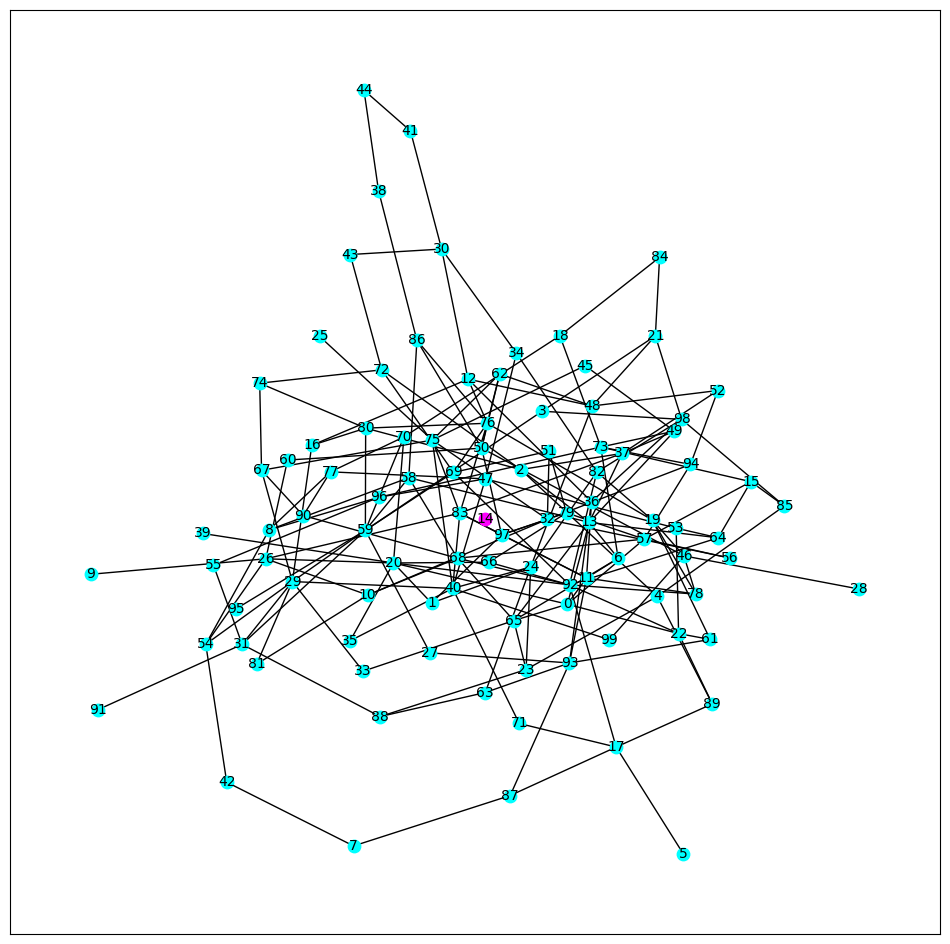

In [11]:
visualize_graph(adj_matrix)

In [12]:
print_adj_matrix(adj_matrix)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
print_adj_list(adj_list)

0: [11, 13, 20, 22, 57, 65]
1: [20, 24, 97]
2: [4, 13, 37, 72, 80]
3: [21, 59, 98]
4: [2, 23, 85, 89]
5: [17]
6: [11, 13, 65, 73]
7: [42, 87]
8: [54, 58, 77, 96]
9: [26]


## Adjacency matrix:
advantages:
- easy implementation
- checking exists a edge between two vertex for $O(1)$
    
disadvantages:
- requires $O(V^2)$ space for any type of graph -> bad for sparse graphs

## Adjacency List:
advantages:
- requires $O(V+E)$ space for any types of graph
- good for sparse graphs
    
disadvantages:
- checking exists a edge between two vertex for $O(V)$

In [14]:
n_comp, vertex = get_connected_components(adj_list)

In [15]:
print(f'Graph has {n_comp} compoment' + 's' if n_comp > 1 else '')

Graph has 2 compoments


In [16]:
print(vertex)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Every vertex has a number - number of a components

In [17]:
v, u = 0, 0
while u == v:
    v = randint(0, VERT_N - 1)
    u = randint(0, VERT_N - 1)

print(f'{u = },{v = }')
path = bfs_shortest_path(adj_matrix, u, v)
path

u = 41,v = 2


[41, 30, 43, 72, 2]

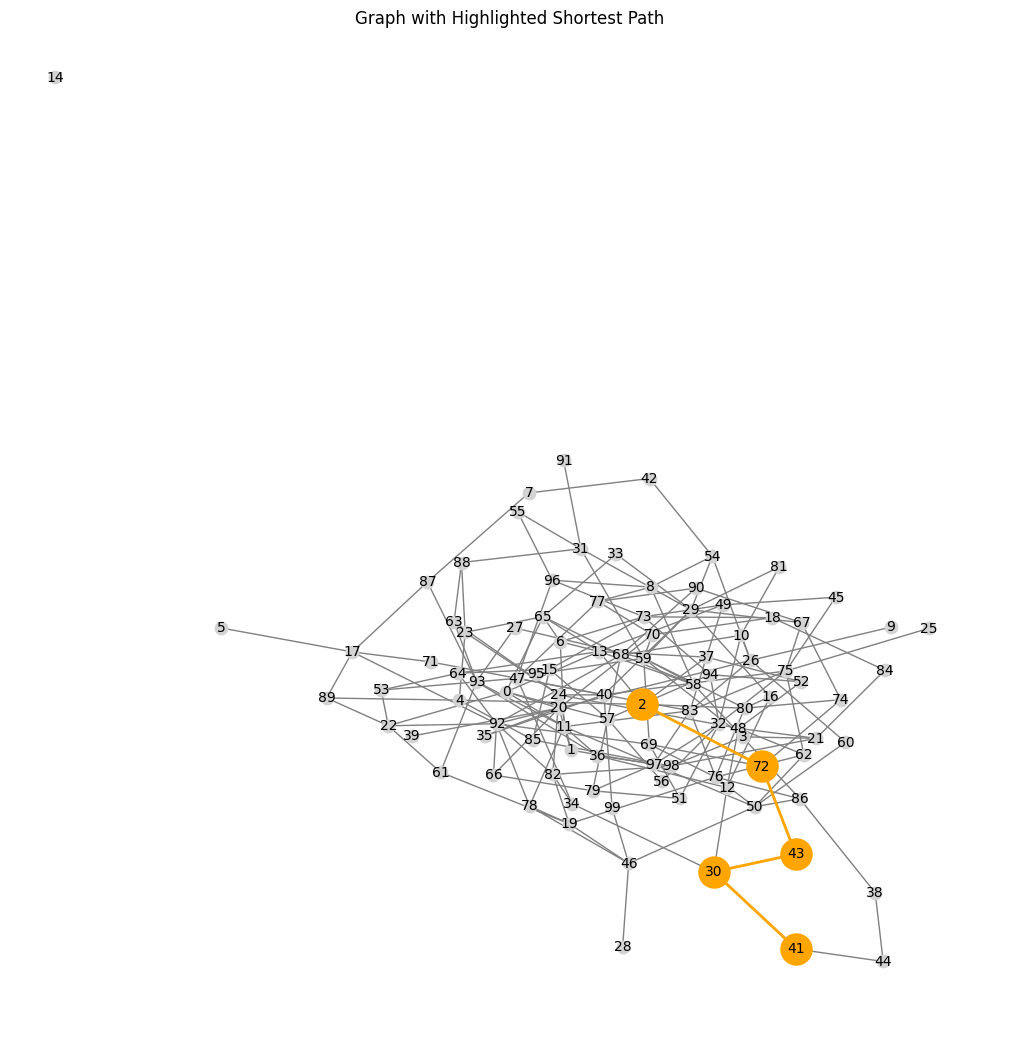

In [18]:
visualize_graph_with_path(adj_matrix, path)

Data Structures:
- Adjacency Matrix: Used to represent the graph, where matrix[i][j] indicates the presence of an edge.
- List for Components: A list of lists is used to store connected components.
- Queue for BFS: A Python list (queue) to maintain the order of vertices to explore next.
- Dictionary for Parent Tracking: To reconstruct the path in BFS, a dictionary is used to track the parent of each vertex.

Design Techniques:
- Recursive DFS: Utilizes a recursive approach, enabling a concise implementation while traversing the graph.
- Iterative BFS: Implemented using a queue, ensuring all neighboring vertices are processed level-by-level, which is ideal for finding shortest paths in unweighted graphs.

# Conclusion

The implementation above provides a comprehensive way to generate, analyze, and manipulate graphs using various representations and algorithms. The effectiveness of analyzing graphs using DFS and BFS demonstrates their fundamental roles in numerous applications in computer science, such as network analysis and shortest path finding.